# WINE QUALITY ANALYSIS



**Instructions**

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Two datasets were combined and few values were randomly removed.

Attribute Information:

**Input variables (based on physicochemical tests):**

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

## Loading the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Wine_quality_data.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [4]:
df.shape

(1599, 12)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1598.0,46.433041,32.876249,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1598.0,3.498586,0.080346,2.74000,3.5200,3.52000,3.520000,3.90000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


# DATA PREPARATION

## Dealing with Outliers

<AxesSubplot:>

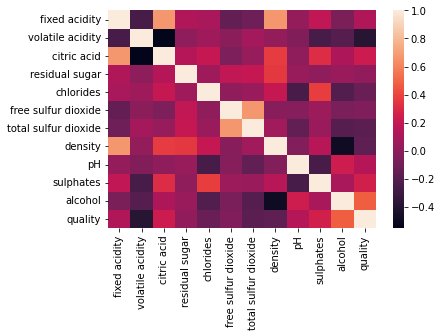

In [7]:
sns.heatmap(df.corr())

In [8]:
df.corr()['quality'].sort_values()

volatile acidity       -0.390258
total sulfur dioxide   -0.184699
density                -0.174741
chlorides              -0.129011
free sulfur dioxide    -0.050899
residual sugar          0.013756
fixed acidity           0.123987
pH                      0.133961
citric acid             0.225867
sulphates               0.251118
alcohol                 0.475943
quality                 1.000000
Name: quality, dtype: float64

We can see that the target variable 'quality' is related to all the other features with a significant amount

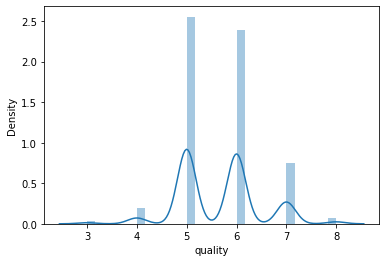

In [9]:
sns.distplot(df['quality']);

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

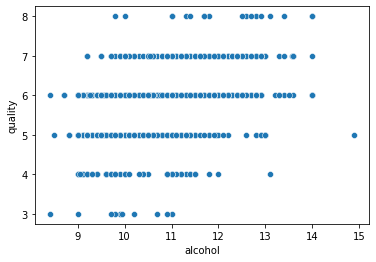

In [10]:
sns.scatterplot(x='alcohol',y='quality',data = df)

You can see from the graph that when quality is 5 and alchol is 15 the point is an outlier because it is not complying to the observed pattern. Also with a little google search we can find that a wine with high alchol content has a richer quality that that with lower one. But this point doesnt agree to that, so we can drop this data

In [11]:
df[(df['alcohol']>14) & (df['quality'] <6)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.9976,3.52,0.84,14.9,5.0


In [12]:
ind_drop = df[(df['alcohol']>14) & (df['quality'] <6)].index

In [13]:
df = df.drop(ind_drop,axis = 0)

In [14]:
df[(df['alcohol']>14) & (df['quality'] <6)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


<AxesSubplot:xlabel='sulphates', ylabel='quality'>

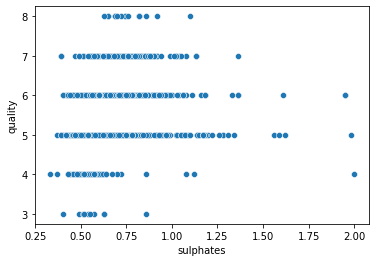

In [16]:
sns.scatterplot(x='sulphates',y ='quality',data = df)

Since sulphates level doesnot directly relate to quality we will leave it be

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

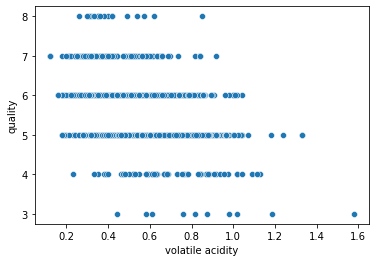

In [17]:
sns.scatterplot(x='volatile acidity',y='quality',data = df)

Volatile acidity has a negative correlation with quality. But the point which corresponds to a quality of 3 and a volatile acidity of 1.58 is too much (the prescibed standards are from 1.2 to 1.4)

In [18]:
df[(df['volatile acidity']>1.4) & (df['quality']<4)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1299,7.6,1.58,0.0,2.1,0.137,5.0,9.0,0.99476,3.52,0.4,10.9,3.0


In [19]:
ind_drop2 = df[(df['volatile acidity']>1.4) & (df['quality']<4)].index

In [20]:
df = df.drop(ind_drop2,axis=0)

In [21]:
df[(df['volatile acidity']>1.4) & (df['quality']<4)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [22]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1597 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1597 non-null   float64
 1   volatile acidity      1597 non-null   float64
 2   citric acid           1597 non-null   float64
 3   residual sugar        1597 non-null   float64
 4   chlorides             1597 non-null   float64
 5   free sulfur dioxide   1597 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1597 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1597 non-null   float64
 10  alcohol               1597 non-null   float64
 11  quality               1596 non-null   float64
dtypes: float64(12)
memory usage: 162.2 KB


## Dealing with missing data

In [24]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [25]:
def percent_missing(df):
    percent_nan = 100*df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [26]:
percent_nan = percent_missing(df)

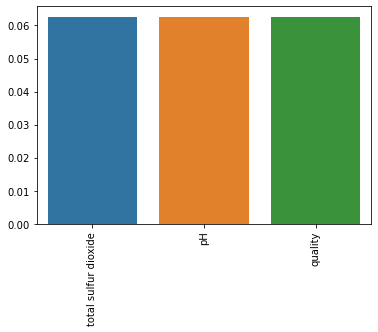

In [27]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

All the missing values account for only 6% percent of the data which is totally 3 points so we can delete the data points, it wont affect the training at all.

In [28]:
df = df.dropna()

In [29]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1594 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1594 non-null   float64
 1   volatile acidity      1594 non-null   float64
 2   citric acid           1594 non-null   float64
 3   residual sugar        1594 non-null   float64
 4   chlorides             1594 non-null   float64
 5   free sulfur dioxide   1594 non-null   float64
 6   total sulfur dioxide  1594 non-null   float64
 7   density               1594 non-null   float64
 8   pH                    1594 non-null   float64
 9   sulphates             1594 non-null   float64
 10  alcohol               1594 non-null   float64
 11  quality               1594 non-null   float64
dtypes: float64(12)
memory usage: 161.9 KB


## Dealing with categorial data

Neither the features nor the label contain categorial data so there is no need of any feature engineering.

# EXPLORATORY DATA ANALYSIS

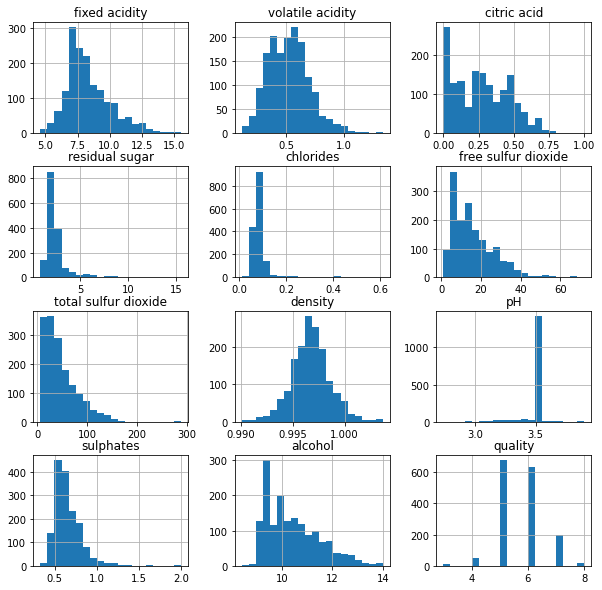

In [31]:
df.hist(bins = 20, figsize=(10,10));

Now let’s draw the count plot to visualise the number data for each quality of wine.

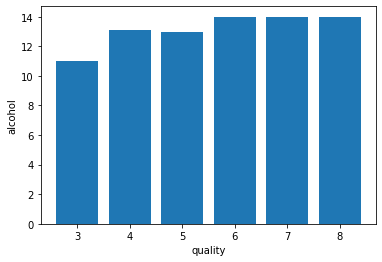

In [32]:
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol');

There are times the data provided to us contains redundant features they do not help with increasing the model’s performance that is why we remove them before using them to train our model.

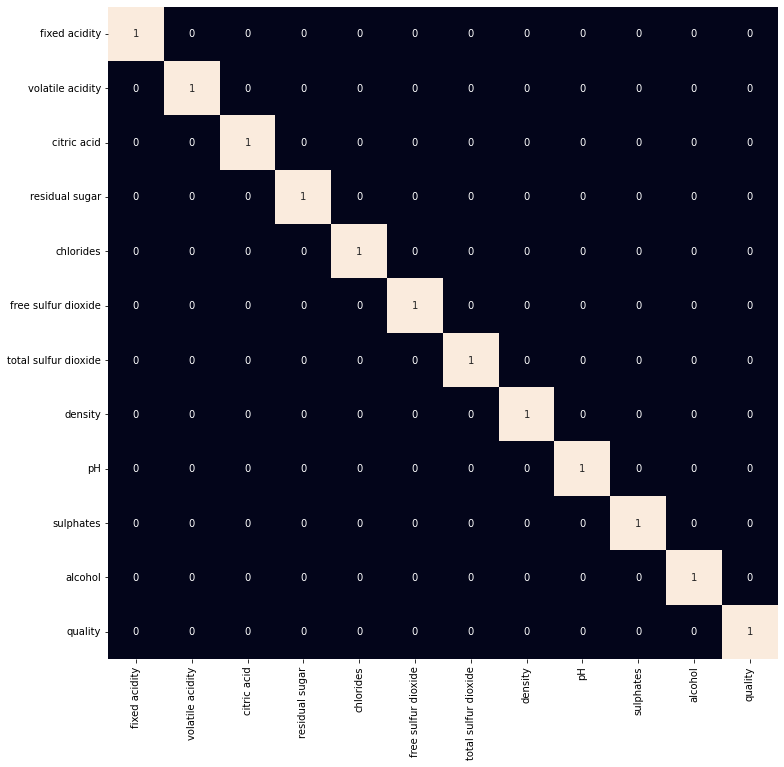

In [33]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()

## Model development

Lets treat this as a classification task. Our aim is to find given the features whether a wine is of good quality or bad quality.We can assume a bottle of wine as 'good quality' if it had a quality score of 7 or higher,and if it had a score of less than 7, it was deemed ‘bad quality’.

In [34]:
def quality_assign(var):
    return 1 if var>=7 else 0

In [35]:
df['quality'] = df['quality'].apply(quality_assign)

I wanted to make sure that there was a reasonable number of good quality wines. Based on the results below, it seemed like a fair enough number. 

In [36]:
df['quality'].unique()

array([0, 1], dtype=int64)

In [37]:
df['quality'].value_counts()

0    1377
1     217
Name: quality, dtype: int64

## Train test split

In [38]:
X = df.drop('quality',axis = 1)
y = df['quality']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

## Standardizing feature variables

Since we have features with different units it is better to standardize the data so that the model understands the data better

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regresssion

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
log_model = LogisticRegression()

In [42]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [43]:
log_model.coef_

array([[ 4.32067135e-01, -4.29711499e-01,  1.59683744e-01,
         3.71083226e-01, -3.31802346e-01, -1.62683683e-04,
        -5.21484772e-01, -6.19611420e-01,  2.36845678e-02,
         6.43014035e-01,  7.37685463e-01]])

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [45]:
y_pred = log_model.predict(scaled_X_test)

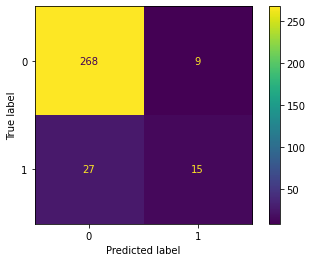

In [46]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

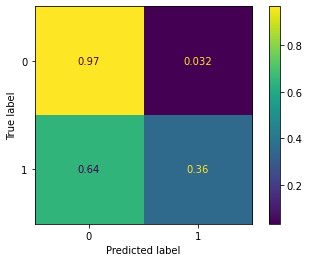

In [47]:
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       277
           1       0.62      0.36      0.45        42

    accuracy                           0.89       319
   macro avg       0.77      0.66      0.70       319
weighted avg       0.87      0.89      0.87       319



## Support vector classifier

In [49]:
from sklearn.svm import SVC

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)

In [52]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [53]:
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [54]:
grid.best_score_

0.8792156862745099

In [55]:
svm_model = SVC(C =1 ,kernel = 'rbf')
svm_model.fit(scaled_X_train,y_train)

SVC(C=1)

In [56]:
y_pred = svm_model.predict(scaled_X_test)

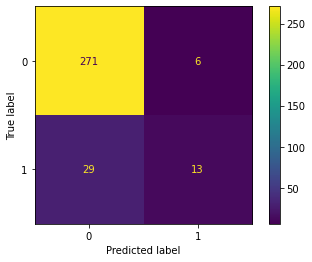

In [57]:
plot_confusion_matrix(svm_model,scaled_X_test,y_test)

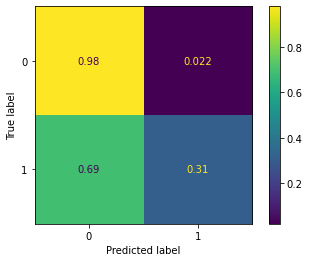

In [58]:
plot_confusion_matrix(svm_model,scaled_X_test,y_test,normalize='true')

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       277
           1       0.68      0.31      0.43        42

    accuracy                           0.89       319
   macro avg       0.79      0.64      0.68       319
weighted avg       0.87      0.89      0.87       319



## Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
tree_model = DecisionTreeClassifier(random_state=40)

In [62]:
tree_model.fit(scaled_X_train,y_train)

DecisionTreeClassifier(random_state=40)

In [63]:
y_pred = tree_model.predict(scaled_X_test)

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       277
           1       0.52      0.69      0.59        42

    accuracy                           0.87       319
   macro avg       0.73      0.80      0.76       319
weighted avg       0.89      0.87      0.88       319



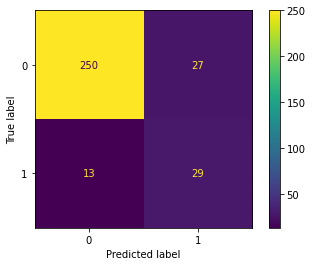

In [65]:
plot_confusion_matrix(tree_model,scaled_X_test,y_test)

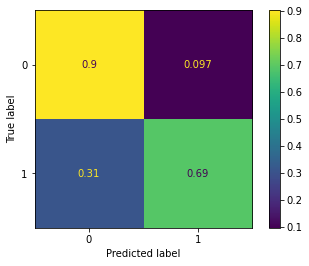

In [66]:
plot_confusion_matrix(tree_model,scaled_X_test,y_test,normalize = 'true')

## Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [69]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

In [70]:
rfc = RandomForestClassifier()

In [71]:
grid = GridSearchCV(rfc,param_grid)

In [72]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [73]:
grid.best_params_

{'bootstrap': False,
 'max_features': 2,
 'n_estimators': 128,
 'oob_score': False}

In [74]:
y_pred = grid.predict(scaled_X_test)

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       277
           1       0.71      0.52      0.60        42

    accuracy                           0.91       319
   macro avg       0.82      0.75      0.78       319
weighted avg       0.90      0.91      0.90       319



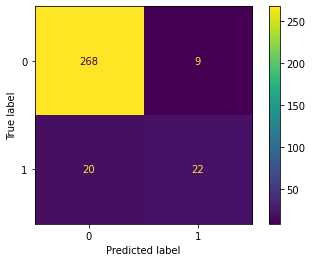

In [76]:
plot_confusion_matrix(grid,scaled_X_test,y_test)

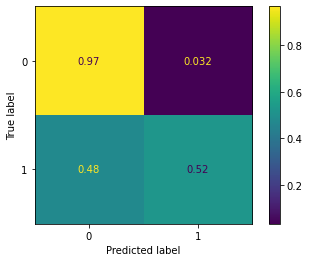

In [77]:
plot_confusion_matrix(grid,scaled_X_test,y_test,normalize = 'true')

## Ada Boost

In [78]:
from sklearn.ensemble import AdaBoostClassifier

In [79]:
error_rates = []

for n in range(1,96):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

Text(0, 0.5, 'error_rates')

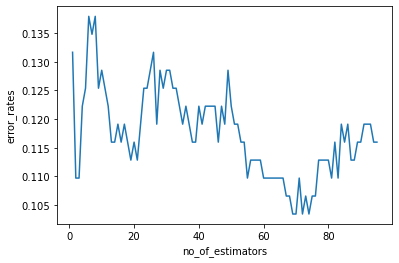

In [80]:
plt.plot(range(1,96),error_rates)
plt.xlabel('no_of_estimators')
plt.ylabel('error_rates')

In [81]:
ada_model = AdaBoostClassifier(n_estimators = 70, random_state= 40)
ada_model.fit(scaled_X_train,y_train)

AdaBoostClassifier(n_estimators=70, random_state=40)

Since the error rates are less in between 60 and 70 let's assume no of estimators to be 70

In [82]:
y_pred = ada_model.predict(scaled_X_test)

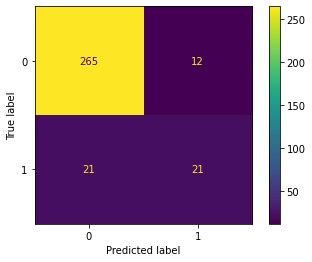

In [83]:
plot_confusion_matrix(ada_model,scaled_X_test,y_test)

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       277
           1       0.64      0.50      0.56        42

    accuracy                           0.90       319
   macro avg       0.78      0.73      0.75       319
weighted avg       0.89      0.90      0.89       319



## Gradient Boost

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
param_grid = {"n_estimators":[e for e in range(1,96)],'max_depth':[3,4,5,6]}

In [88]:
gb_model = GradientBoostingClassifier()

In [89]:
grid_gb = GridSearchCV(gb_model,param_grid)

In [90]:
grid_gb.fit(scaled_X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [91]:
grid_gb.best_params_

{'max_depth': 5, 'n_estimators': 85}

In [92]:
y_pred = grid_gb.predict(X_test)

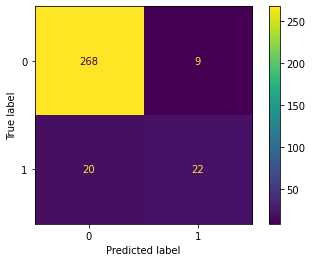

In [93]:
plot_confusion_matrix(grid,scaled_X_test,y_test)

In [94]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       277
           1       0.00      0.00      0.00        42

    accuracy                           0.87       319
   macro avg       0.43      0.50      0.46       319
weighted avg       0.75      0.87      0.81       319



## XG Boost

In [95]:
import xgboost as xgb
xgb = xgb.XGBClassifier(random_state=40)
xgb.fit(scaled_X_train, y_train)
y_pred = xgb.predict(scaled_X_test)

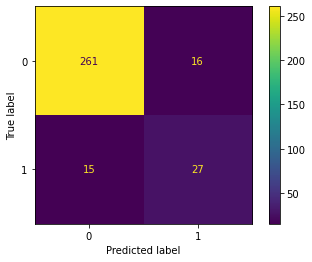

In [96]:
plot_confusion_matrix(xgb,scaled_X_test,y_test)

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       277
           1       0.63      0.64      0.64        42

    accuracy                           0.90       319
   macro avg       0.79      0.79      0.79       319
weighted avg       0.90      0.90      0.90       319



#### Conclusion

Comparing all the models, Random Forest classifier and XGBoost classifier seems to yield a good level of accuracy and has a good f1-score. But since Random Forest classifier has a good accuarcy score as well as good f1-score. We will build the final model based around Random Forest classifier.

## Final model

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128, 'oob_score': False}

In [98]:
final_model = RandomForestClassifier(bootstrap = True, max_features =  2,n_estimators = 128, oob_score =  False,random_state = 40)

In [99]:
final_model.fit(X,y)

RandomForestClassifier(max_features=2, n_estimators=128, random_state=40)

Below, the feature importance is graphed based on the Random Forest model and the XGBoost model. While they slightly vary, the top 3 features are the same: alcohol, volatile acidity, and sulphates. `

<AxesSubplot:>

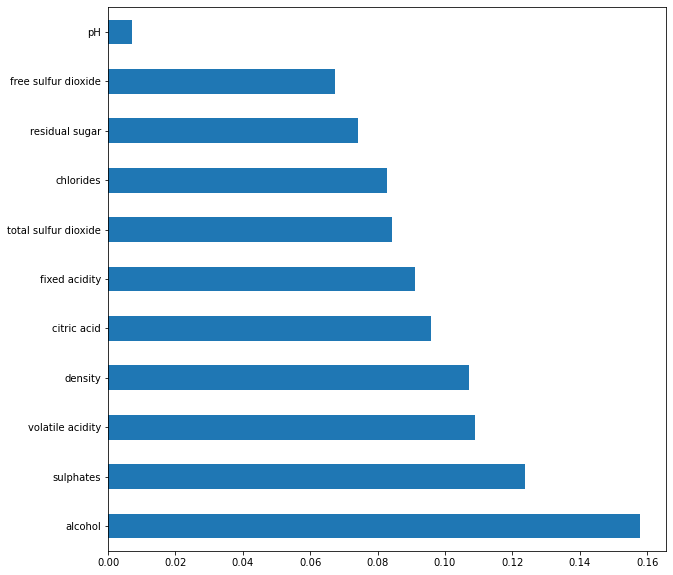

In [100]:
feat_importances = pd.Series(final_model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

<AxesSubplot:>

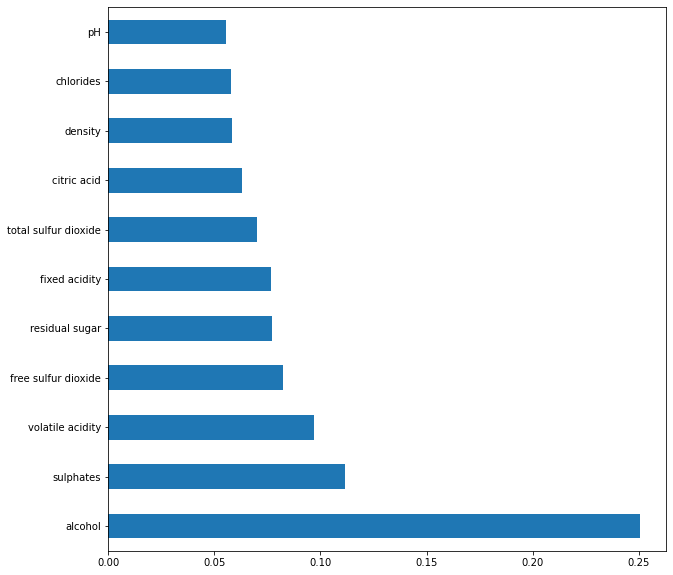

In [102]:
import xgboost as xgb
xgb = xgb.XGBClassifier(random_state=40)
xgb.fit(X, y)
y_pred = xgb.predict(X_test)
feat_importances = pd.Series(xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

Split the dataset into good quality and bad quality to compare these variables in more detail.

## Good quality

In [106]:
df_temp = df[df['quality']==1]
df_temp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.515207,0.743456,11.518049,1.0
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.030400,0.134038,0.998153,0.0
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,3.230000,0.390000,9.200000,1.0
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.520000,0.650000,10.800000,1.0
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.520000,0.740000,11.600000,1.0
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.520000,0.820000,12.200000,1.0
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.520000,1.360000,14.000000,1.0


## Bad quality

In [105]:
df_temp2 = df[df['quality']==0]
df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.0
mean,8.233551,0.546271,0.254444,2.506572,0.089269,16.185185,48.259259,0.996859,3.496086,0.644808,10.248245,0.0
std,1.672340,0.174303,0.189436,1.408490,0.049181,10.477907,32.585286,0.001810,0.085312,0.170642,0.962565,0.0
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.0
25%,7.100000,0.420000,0.090000,1.900000,0.071000,8.000000,23.000000,0.995780,3.520000,0.540000,9.500000,0.0
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,39.000000,0.996800,3.520000,0.600000,10.000000,0.0
75%,9.100000,0.650000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.520000,0.700000,10.900000,0.0
max,15.600000,1.330000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,3.900000,2.000000,14.000000,0.0


By looking into the details, we can see that good quality wines have higher levels of alcohol on average, have a lower volatile acidity on average, higher levels of sulphates on average, and higher levels of residual sugar on average.

## Model Presistence

## Saving the model

In [107]:
import joblib

In [108]:
joblib.dump(final_model,'final_model.pkl')

['final_model.pkl']

In [109]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [110]:
list(X.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [111]:
joblib.dump(list(X.columns),'column_names.pkl')

['column_names.pkl']

## Loading the model 

In [112]:
col_names = joblib.load('column_names.pkl')

In [113]:
col_names

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [114]:
loaded_model = joblib.load('final_model.pkl')

In [115]:
list(X.iloc[0])

[7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4]

In [116]:
loaded_model.predict([list(X.iloc[0])])

array([0], dtype=int64)

In [117]:
y.iloc[0]

0

In [118]:
list(X.iloc[50])

[6.6, 0.52, 0.04, 2.2, 0.069, 8.0, 15.0, 0.9956, 3.4, 0.63, 9.4]

In [119]:
loaded_model.predict([list(X.iloc[50])])

array([0], dtype=int64)

In [120]:
y.iloc[50]

0

So from the above results you can see the final model is performing well

***THANK YOU***